In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np # NumPy for numerical operations
import pandas as pd # Pandas for data manipulation and analysis
import seaborn as sns # Seaborn for statistical data visualization
from sklearn.model_selection import train_test_split # Scikit-learn for machine learning tasks
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Metrics for model evaluation
from scipy import stats # SciPy for scientific computing and statistics
from scipy.stats import norm # SciPy's stats module for probability distributions
import matplotlib.pyplot as plt # Matplotlib for data visualization

In [3]:
train = pd.read_csv('train.csv')

In [4]:
anomaly_columns = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 
                   'fasting blood sugar','Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']
z_scores = train[anomaly_columns].apply(stats.zscore)
mask = (z_scores >= -3) & (z_scores <= 3)
train = train[mask.all(axis=1)]

In [5]:
def plot_histogram_and_fit(column, bins=9):
    
    # Plotting the histogram of the given column with specified bins, density normalization, and color settings
    plt.hist(column, bins=bins, density=True, color='#E0F4FF', edgecolor='#363062')
    
    # Calculating the mean (mu) and standard deviation (std) for fitting the normal distribution curve
    mu, std = norm.fit(column)
    
    # Defining the range for the x-axis based on the histogram
    xmin, xmax = plt.xlim()
    
    # Generating 100 points for the x-axis within the specified range
    x = np.linspace(xmin, xmax, 100)
    
    # Calculating the probability density function (pdf) of the normal distribution
    p = norm.pdf(x, mu, std)
    
    # Plotting the normal distribution curve on top of the histogram
    plt.plot(x, p, 'k', linewidth=2)
    
    # Adding labels and title to the plot
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column.name}')
    
    # Displaying the plot
    plt.show()

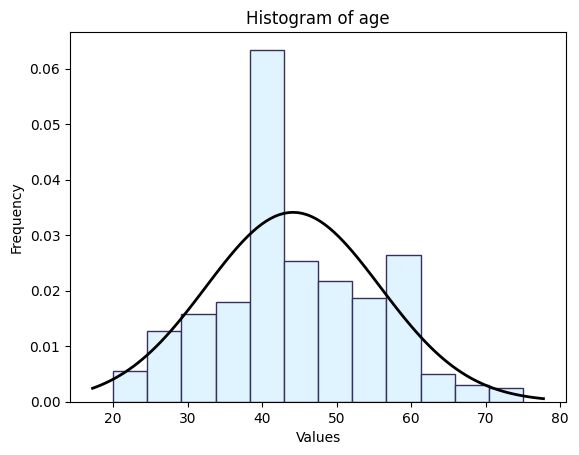

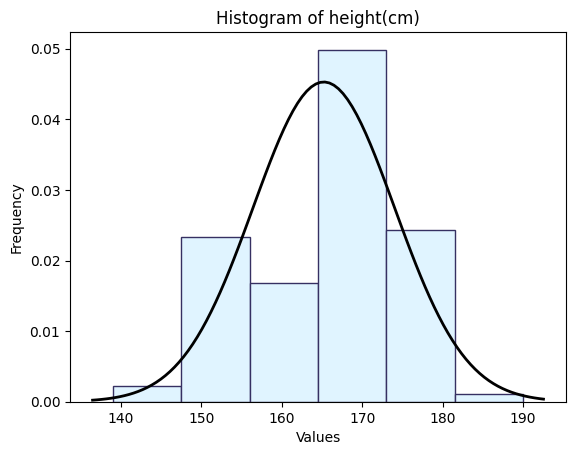

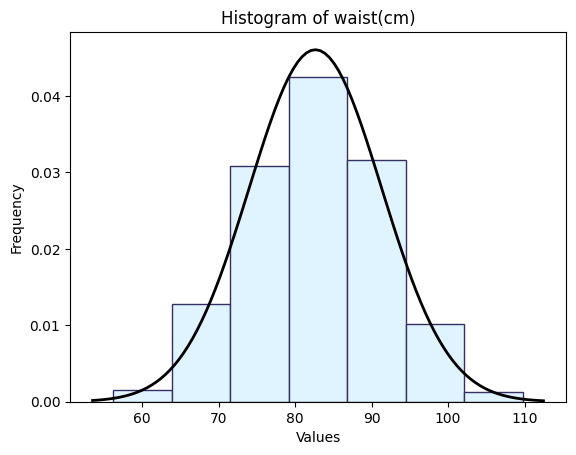

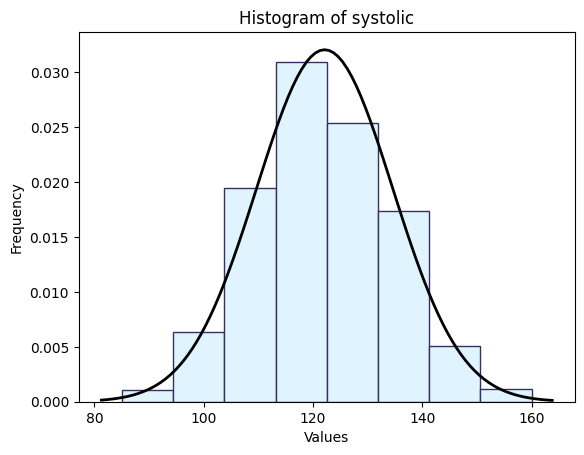

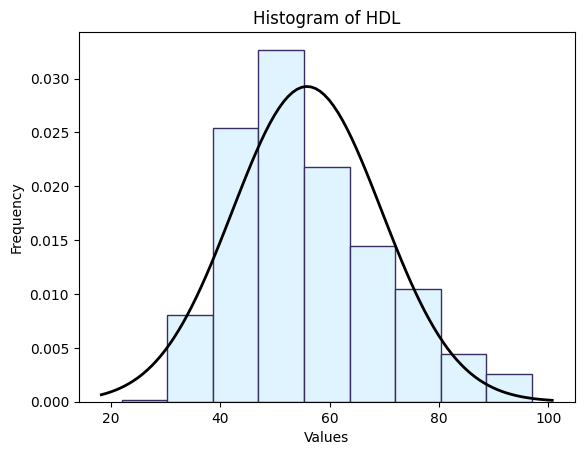

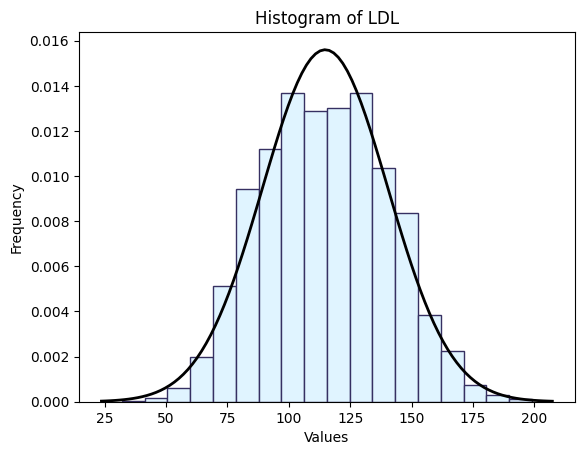

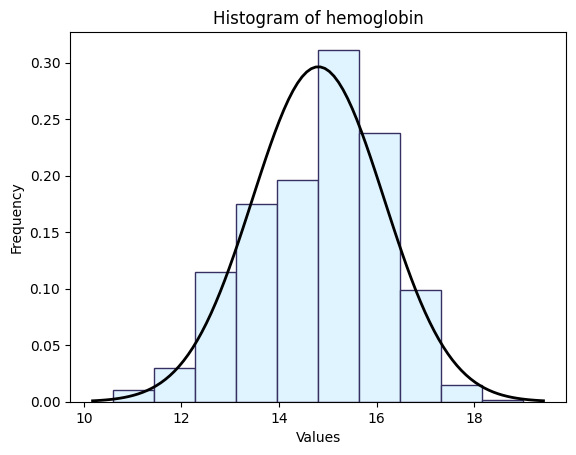

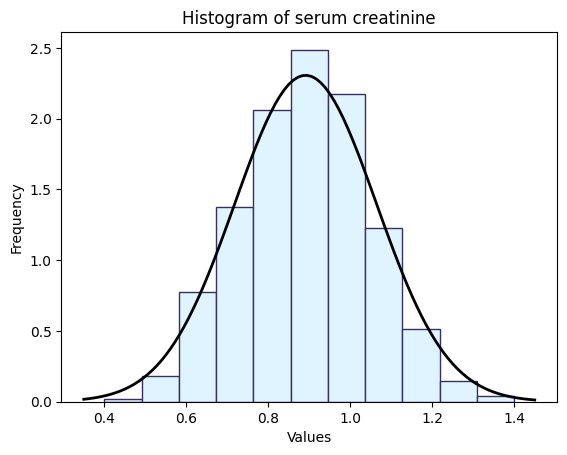

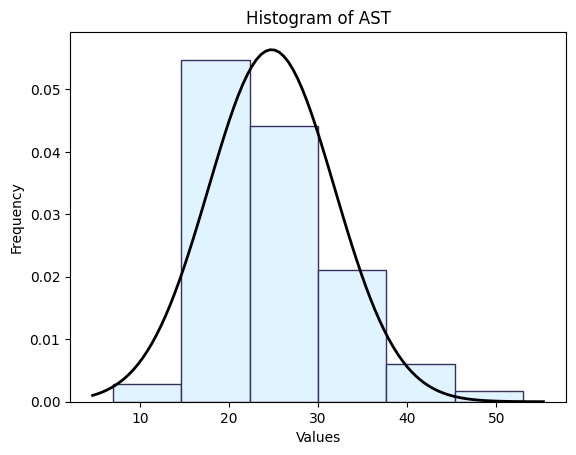

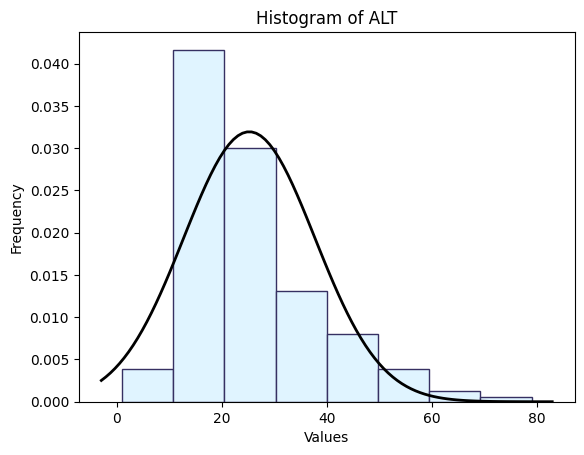

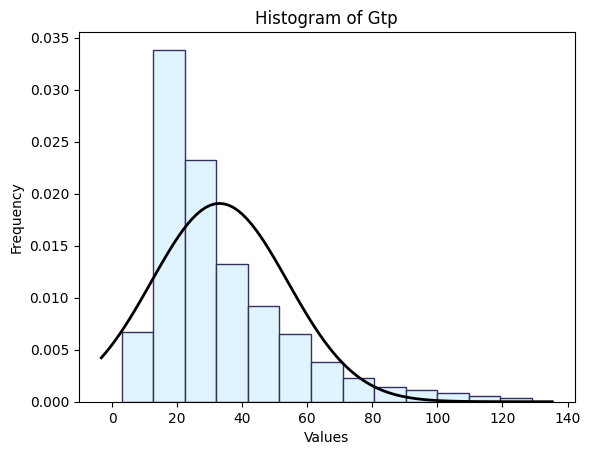

In [6]:
plot_histogram_and_fit(train['age'], bins=12) 
plot_histogram_and_fit(train['height(cm)'], bins=6)
plot_histogram_and_fit(train['waist(cm)'], bins=7)
plot_histogram_and_fit(train['systolic'], bins=8)
plot_histogram_and_fit(train['HDL'], bins=9)
plot_histogram_and_fit(train['LDL'], bins=18)
plot_histogram_and_fit(train['hemoglobin'], bins=10)
plot_histogram_and_fit(train['serum creatinine'], bins=11)
plot_histogram_and_fit(train['AST'], bins=6)
plot_histogram_and_fit(train['ALT'], bins=8)
plot_histogram_and_fit(train['Gtp'], bins=13)

In [7]:
columns_to_log = ['age', 'height(cm)', 'LDL', 'systolic', 'HDL', 'hemoglobin', 'AST', 'ALT', 'Gtp']


In [8]:
for column_name in columns_to_log:
    train[column_name] = np.log(train[column_name])


In [9]:
columns_to_encode = ['hearing(left)', 'hearing(right)', 'dental caries', 'Urine protein']
train = pd.get_dummies(train, columns=columns_to_encode)

In [10]:
# Identify and retrieve the columns containing boolean data in the 'train' dataframe
bool_columns = train.select_dtypes(include=['bool']).columns.tolist()

In [11]:
# Convert boolean columns to integer type (0 for False, 1 for True)
for column in bool_columns:
    train[column] = train[column].astype(int)

In [12]:
train = train.drop(columns=['id'])

In [14]:
X = train.drop(columns=['smoking'])
y = train['smoking'].astype(float)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
from catboost import CatBoostClassifier

In [46]:
# Initializing the CatBoostClassifier with specified hyperparameters
model1 = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', cat_features=[], verbose=0)

# Training the model on the training dataset
model1.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred1 = model1.predict(X_test)

# Calculating the accuracy of the model by comparing predicted labels to actual labels
accuracy1 = accuracy_score(y_test, y_pred1)

# Displaying the accuracy percentage
print("accuracy = ", (accuracy1*100))

accuracy =  78.72879904060305


In [31]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
# Initializing the CatBoostClassifier with specified hyperparameters
model2 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)

# Training the model on the training dataset
model2.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred2 = model2.predict(X_test)

# Calculating the accuracy of the model by comparing predicted labels to actual labels
accuracy2 = accuracy_score(y_test, y_pred2)

# Displaying the accuracy percentage
print("accuracy = ", (accuracy2*100))
print('precision', precision_score(y_test,y_pred2))

accuracy =  78.32105533664554
precision 0.7274180655475619


In [34]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
# Initializing the CatBoostClassifier with specified hyperparameters
model3 = RidgeClassifier()

# Training the model on the training dataset
model3.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred3 = model3.predict(X_test)

# Calculating the accuracy of the model by comparing predicted labels to actual labels
accuracy3 = accuracy_score(y_test, y_pred3)

# Displaying the accuracy percentage
print("accuracy = ", (accuracy3*100))
print('precision', precision_score(y_test,y_pred3))

accuracy =  76.16926503340757
precision 0.7077706442328979


In [39]:
scores=[]
for i in range(5):
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=i)
    model1.fit(X_train,y_train)
    test = model1.predict(X_test)
    print(scores.append(r2_score(y_test,test)))

None
None
None
None
None


In [40]:
np.argmax(scores)

0

In [47]:
test = pd.read_csv('test.csv')

In [48]:
test_id = test['id']

In [49]:
# One hot encode the test data
columns_to_encode = ['hearing(left)', 'hearing(right)', 'dental caries', 'Urine protein']
test = pd.get_dummies(test, columns=columns_to_encode)
test.dtypes

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
hearing(left)_1           bool
hearing(left)_2           bool
hearing(right)_1          bool
hearing(right)_2          bool
dental caries_0           bool
dental caries_1           bool
Urine protein_1           bool
Urine protein_2           bool
Urine protein_3           bool
Urine protein_4           bool
Urine protein_5           bool
Urine protein_6           bool
dtype: object

In [50]:
# Identify and retrieve the columns containing boolean data in the 'test' dataframe
bool_columns = test.select_dtypes(include=['bool']).columns.tolist()

In [51]:
for column in bool_columns:
    test[column] = test[column].astype(int)
test.dtypes

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
hearing(left)_1          int32
hearing(left)_2          int32
hearing(right)_1         int32
hearing(right)_2         int32
dental caries_0          int32
dental caries_1          int32
Urine protein_1          int32
Urine protein_2          int32
Urine protein_3          int32
Urine protein_4          int32
Urine protein_5          int32
Urine protein_6          int32
dtype: object

In [52]:
# Remove íd' column from test data
test = test.drop(columns=['id'])

In [54]:
test_prediction = model3.predict(test)

In [55]:
# Creating a DataFrame 'predicted_file' with 'id' from the test dataset and 'smoking' predictions
predicted_file = pd.DataFrame({'id': test_id, 'smoking': test_prediction})

# Saving the DataFrame to a CSV file named 'submission.csv' without including the index
predicted_file.to_csv('submission.csv', index=False)